In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
train_X = train_X / 255.0
test_X = test_X /255.0

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


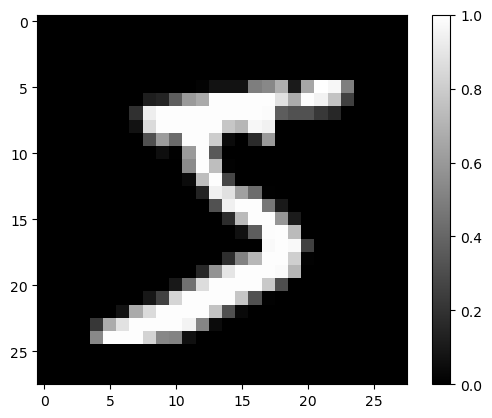

5


In [4]:
plt.imshow(train_X[0].reshape(28, 28), cmap="gray")
plt.colorbar()
plt.show()

print(train_Y[0])

In [8]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, test_X.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(784, activation="sigmoid")
])

model.compile(optimizer=tf.optimizers.Adam(), loss = "mse")
model.summary()

(60000, 784) (10000, 784)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,640 (2.73 MB)

 Trainable params: 716,640 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0852
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0193
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0124
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0098
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0084
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0075
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0069
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0065
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0061
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


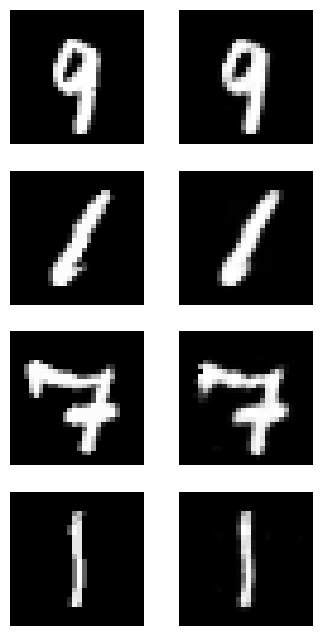

In [19]:
import random
import numpy as np

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c *2 + 1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap="gray")
    plt.axis("off")

    plt.subplot(4, 2, c *2 + 2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()

<Figure size 640x480 with 0 Axes>

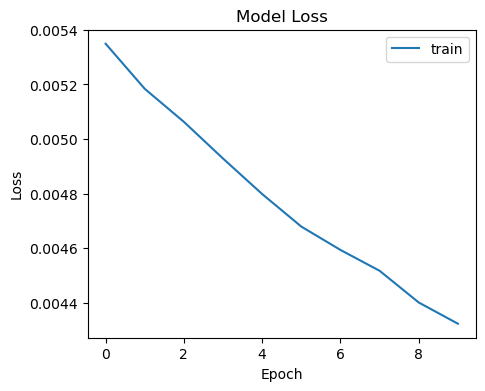

In [27]:
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

plt.show()

In [10]:
model.evaluate(test_X, test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0059


0.005800280719995499